# Notebook to verify counters and stuff

Author: Brain Gravelle (gravelle@cs.uoregon.edu)


All this is using the taucmdr python libraries from paratools
http://taucommander.paratools.com/


## Imports
This section imports necessary libraies, the metrics.py and utilities.py files and sets up the window.

In [14]:
# A couple of scripts to set the environent and import data from a .tau set of results
from utilities import *
from metrics import *
# Plotting, notebook settings:
%matplotlib inline  
#plt.rcParams.update({'font.size': 16})
import numbers
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format', lambda x: '%.2e' % x)
pd.set_option('display.max_columns',100)
pd.set_option('max_colwidth', 70)

## Getting Data

TAU Commander uses TAU to run the application and measure it using runtime sampling techniques (similar to Intel VTune). Many customization options are available. For example, we may consider each function regardless of calling context, or we may decide to enable callpath profiling to see each context separately.

From the talapas_scaling application the following experiments are available. These use Talapas (with 28 thread Broadwell processors) and the build-ce (realistic) option for mkFit. The first six experiments use the --num-thr option to set the thread count which is intended to perform threading within the events. the last two add the --num-ev-thr option to set the event threads, so that all threads are used to process events in parallel and each event is processed by a single thread. 
* manual_scaling_Large_talapas		
* manual_scaling_Large_talapas_fullnode	
* manual_scaling_TTbar70_talapas		
* manual_scaling_TTbar70_talapas_fullnode
* manual_scaling_TTbar35_talapas
* manual_scaling_TTbar35_talapas_fullnode
* ev_thr_scaling_Large_talapas
* ev_thr_scaling_Large_talapas_fullnode

Additionally available in the cori_scaling application are the following. These were run on NERSC's Cori on the KNL with the default memory settings (quad - 1 NUMA domain, cache - MCDRAM as direct mapped cache). See http://www.nersc.gov/users/computational-systems/cori/running-jobs/advanced-running-jobs-options/ for more info on the KNL modes. Similar to the talapas scaling they use the build-ce option and threading within each event.
* manual_scaling_TTbar35


### Importing Scaling Data
Here we import the data. In this case we are using Cori data from the experiments with the threads working within each event using the TTbar35 file. Note that this box will take 10 or more minutes to run; please go enjoy a coffee while you wait.

In [78]:
# application = "talapas_scaling"
# experiment  = "manual_scaling_TTbar70_talapas"
# experiment  = "manual_scaling_Large_talapas"
# experiment = "ev_thr_scaling_Large_talapas"

# application = "cori_scaling"
# experiment  = "manual_scaling_TTbar35"

application = "cache_test"
experiment  = "lictest_lst"
experiment2 = "mictest_lst_56"

path  = ".tau/" + application + "/" + experiment + "/"
path2 = ".tau/" + application + "/" + experiment2 + "/"
# note that this function takes a long time to run, so only rerun if you must
metric_data  = get_pandas_scaling(path, callpaths=True)
metric_data2 = get_pandas_scaling(path2, callpaths=True)
# metric_data = remove_erroneous_threads(metric_data,  [1, 8, 16, 32, 48, 56])
# metric_data = remove_erroneous_threads(metric_data,  [1, 8, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256])

#### A list of metrics

In [79]:
print_available_metrics(metric_data,True)
print metric_data.keys()
print_available_metrics(metric_data2,True)
print metric_data2.keys()

PAPI_LST_INS
[32, 1, 48, 8, 16, 56]
PAPI_LST_INS
[56]


#### Metric metadata

In [66]:
#print_metadata(metric_data[1])

In [67]:
lst_ins = filter_libs_out(metric_data[1]['PAPI_LST_INS']).sort_values(by='Inclusive',ascending=True)[["Inclusive"]]
lst_ins.head(10)

Inclusive
context thread region                                                                           
0       0      [SUMMARY] __read                                                         1.81e+05
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   1.81e+05
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.43e+07
               [SUMMARY] (anonymous namespace)::fill_seed_layer_sig(Track const&, ...   3.43e+07
               [SUMMARY] __GI___underflow                                               3.84e+07
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.84e+07
               [SUMMARY] Track::getLastHitOnTrack() const                               3.89e+07
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.89e+07
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.94e+07
               [SUMMARY] Matriplex::Matriplex<float, 6, 3, 8>::operator()(int, int...   3.94e+07

In [68]:
lst_ins = filter_libs_out(metric_data[8]['PAPI_LST_INS']).sort_values(by='Inclusive',ascending=True)[["Inclusive"]]
lst_ins.head(10)

Inclusive
context thread region                                                                           
0       0      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   2.56e+05
               [SUMMARY] __read                                                         2.56e+05
        1      [SUMMARY] __GI__IO_file_underflow                                        2.84e+06
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   2.84e+06
               [SUMMARY] Event::read_in(DataFile&, _IO_FILE*)                           3.60e+06
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.60e+06
        6      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.98e+06
               [SUMMARY] Event::read_in(DataFile&, _IO_FILE*)                           3.98e+06
        2      [SUMMARY] _IO_file_xsgetn                                                4.24e+06
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   4.24e+06

In [69]:
lst_ins = filter_libs_out(metric_data[16]['PAPI_LST_INS']).sort_values(by='Inclusive',ascending=True)[["Inclusive"]]
lst_ins.head(10)

Inclusive
context thread region                                                                           
0       0      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.20e+05
               [SUMMARY] __read                                                         3.20e+05
        14     [SUMMARY] Track::Status::Status()                                        5.37e+05
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   5.37e+05
        0      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   8.45e+05
               [SUMMARY] __GI_madvise                                                   8.45e+05
        1      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   1.12e+06
               [SUMMARY] Track::Track()                                                 1.12e+06
        14     [SUMMARY] _IO_file_xsgetn                                                2.07e+06
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   2.07e+06

In [70]:
lst_ins = filter_libs_out(metric_data[32]['PAPI_LST_INS']).sort_values(by='Inclusive',ascending=True)[["Inclusive"]]
lst_ins.head(10)

Inclusive
context thread region                                                                           
0       0      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   2.19e+05
               [SUMMARY] __read                                                         2.19e+05
        7      [SUMMARY] __GI___mempcpy                                                 5.01e+05
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   5.01e+05
        23     [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   8.60e+05
               [SUMMARY] __GI___mempcpy                                                 8.60e+05
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   9.68e+05
               [SUMMARY] __memcpy_sse2                                                  9.68e+05
        12     [SUMMARY] ROOT::Math::SMatrix<float, 6u, 6u, ROOT::Math::MatRepSym<...   1.15e+06
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   1.15e+06

In [71]:
lst_ins = filter_libs_out(metric_data[48]['PAPI_LST_INS']).sort_values(by='Inclusive',ascending=True)[["Inclusive"]]
lst_ins.head(10)

Inclusive
context thread region                                                                           
0       21     [SUMMARY] Event::relabel_bad_seedtracks()                                2.31e+05
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   2.31e+05
        0      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   3.20e+05
               [SUMMARY] __read                                                         3.20e+05
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   9.65e+05
               [SUMMARY] sysmalloc                                                      9.65e+05
        39     [SUMMARY] __memcpy_sse2                                                  1.53e+06
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   1.53e+06
        26     [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   1.87e+06
               [SUMMARY] __GI___mempcpy                                                 1.87e+06

In [80]:
lst_ins = filter_libs_out(metric_data[56]['PAPI_LST_INS']).sort_values(by='Inclusive',ascending=True)[["Inclusive"]]
lst_ins.head(10)

Inclusive
context thread region                                                                           
0       0      [SUMMARY] __lll_lock_wait_private                                       -6.26e+10
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...  -6.26e+10
               [SUMMARY] .TAU application                                              -5.16e+10
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application               -5.16e+10
               [SUMMARY] __GI_madvise                                                  -1.24e+10
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...  -1.24e+10
               [SUMMARY] Track::nTotalHits() const                                      2.98e+04
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   2.98e+04
        54     [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   1.08e+05
               [SUMMARY] Event::relabel_bad_seedtracks()                                1.08e+05

In [82]:
lst_ins2 = filter_libs_out(metric_data2[56]['PAPI_LST_INS']).sort_values(by='Inclusive',ascending=False)[["Inclusive"]]
lst_ins2.head(10)

Inclusive
context thread region                                                              
0       43     [SUMMARY] .TAU application                                  7.02e+10
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application   7.02e+10
        22     [SUMMARY] .TAU application  => [CONTEXT] .TAU application   5.28e+10
               [SUMMARY] .TAU application                                  5.28e+10
        30     [SUMMARY] .TAU application                                  4.70e+10
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application   4.70e+10
        46     [SUMMARY] .TAU application  => [CONTEXT] .TAU application   4.68e+10
               [SUMMARY] .TAU application                                  4.68e+10
        11     [SUMMARY] .TAU application                                  4.60e+10
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application   4.60e+10

### L1 Missrate vs thread count
Similar to above these cells show the L1 missrates. In this case we want to get the plotting data for L1 acceses and misses but comupte the miss rate before plotting, so we set plot=False

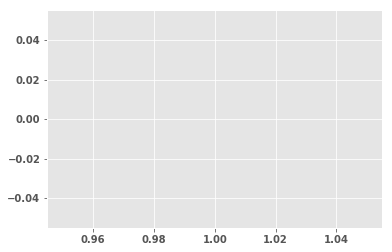

In [8]:
thread_list, L1A_data = scaling_plot(metric_data, plot=False, metric='PAPI_LST_INS')
thread_list, L1M_data = scaling_plot(metric_data, plot=False, metric='PAPI_L1_TCM')
    
L1_MR_list = [L1M_data[i] / L1A_data[i] for i in range(len(thread_list))]

plt = matplotlib.pyplot.plot(thread_list, L1_MR_list)

### L1 Miss rate by each thread of each thread count

thread
0    7317940504
Name: Inclusive, dtype: int64
thread
0    704157560981
Name: Inclusive, dtype: int64
1


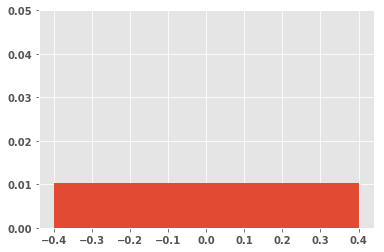

In [9]:
thread_L1A_data = get_thread_level_metric_scaling(metric_data, metric='PAPI_LST_INS')
thread_L1M_data = get_thread_level_metric_scaling(metric_data, metric='PAPI_L1_TCM')

MR_data = {}
for kt in thread_list:
    print(thread_L1M_data[kt])
    print(thread_L1A_data[kt])
    MR_data[kt] = thread_L1M_data[kt] / thread_L1A_data[kt]
    
for kt in thread_list:
    print kt
    data = list(MR_data[kt])
    matplotlib.pyplot.bar(range(len(data)), data)
    matplotlib.pyplot.ylim(ymax=0.05)
    matplotlib.pyplot.show()